In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from mlxtend.plotting import plot_decision_regions


In [2]:
# Load the data
df= pd.read_csv(r"C:\Users\Acer\Downloads\loan_default_risk_dataset.csv")

In [3]:
df.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Type,Customer_Segment,Loan_Default_Risk
0,60.0,2996.52,2378.49,Business,High Risk,0
1,66.4,4137.23,1538.92,Personal,High Risk,1
2,58.5,19865.75,2434.80,Business,High Risk,1
3,49.8,16855.70,2677.82,Personal,Very Low Risk,1
4,67.3,7902.37,2206.72,Business,Medium Risk,0


In [4]:
#checking the dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     300 non-null    float64
 1   Debt_Amount        299 non-null    float64
 2   Monthly_Savings    298 non-null    float64
 3   Loan_Type          300 non-null    object 
 4   Customer_Segment   300 non-null    object 
 5   Loan_Default_Risk  300 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 14.2+ KB


In [5]:
#checking the null values in the dataset
df.isnull().sum()

Retirement_Age       0
Debt_Amount          1
Monthly_Savings      2
Loan_Type            0
Customer_Segment     0
Loan_Default_Risk    0
dtype: int64

In [6]:
#dropping null values
df.dropna(inplace=True)

In [7]:
#re-checking the null values again to check if all the na values are removed
df.isnull().sum()

Retirement_Age       0
Debt_Amount          0
Monthly_Savings      0
Loan_Type            0
Customer_Segment     0
Loan_Default_Risk    0
dtype: int64

In [8]:
#checking the unique values in the string columns before converting it to numeric
df['Loan_Type'].unique()
df['Customer_Segment'].unique()

array(['High Risk', 'Very Low Risk', 'Medium Risk', 'Low Risk'],
      dtype=object)

In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Loan_Type'] = label_encoder.fit_transform(df['Loan_Type'])

In [10]:
label_encoder=preprocessing.LabelEncoder()
df['Customer_Segment'] = label_encoder.fit_transform(df['Customer_Segment'])

In [11]:
cat_mapping = dict(enumerate(label_encoder.classes_))
print(cat_mapping)

{0: 'High Risk', 1: 'Low Risk', 2: 'Medium Risk', 3: 'Very Low Risk'}


In [12]:
#alternative method-1
#df[['Loan_Type','Customer_Segment']] = df[['Loan_Type','Customer_Segment']].apply(label_encoder.fit_transform)

#alternative method-2
# categorical_columns = ['Loan_Type','Customer_Segment']
# for col in categorical_columns:
#     df[col] = label_encoder.fit_transform(df[col])


In [13]:
df['Loan_Type'].unique()

array([1, 4, 3, 2, 0])

In [14]:
df['Customer_Segment'].unique()

array([0, 3, 2, 1])

In [15]:
#Setting the X and y values. Y is the target column and X is the remaining columns
x=df.drop(['Loan_Default_Risk'], axis=1)
y=df['Loan_Default_Risk']

In [16]:
#Splitting in train/test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.30,random_state=42)

In [17]:
#checking the shape of the data
x_train.shape, x_test.shape

((207, 5), (90, 5))

Model accuracy score with criterion gini index: 0.8778
[0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1]
Training-set accuracy score: 0.9275
Training set score: 0.9275
Test set score: 0.8778


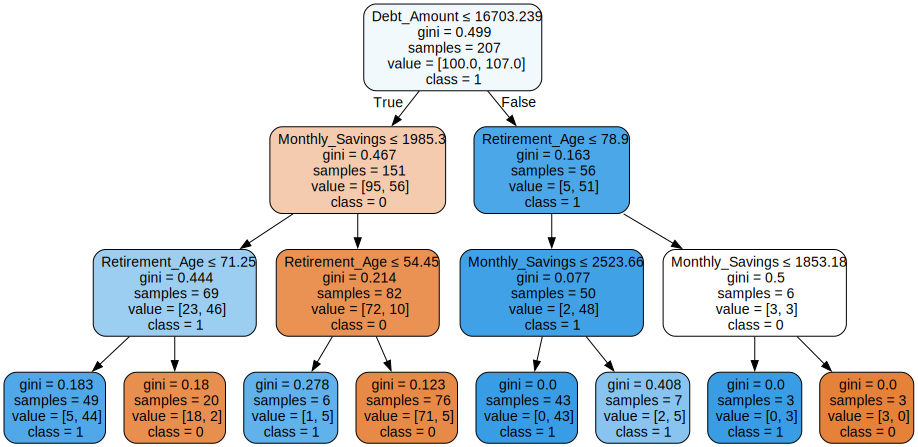

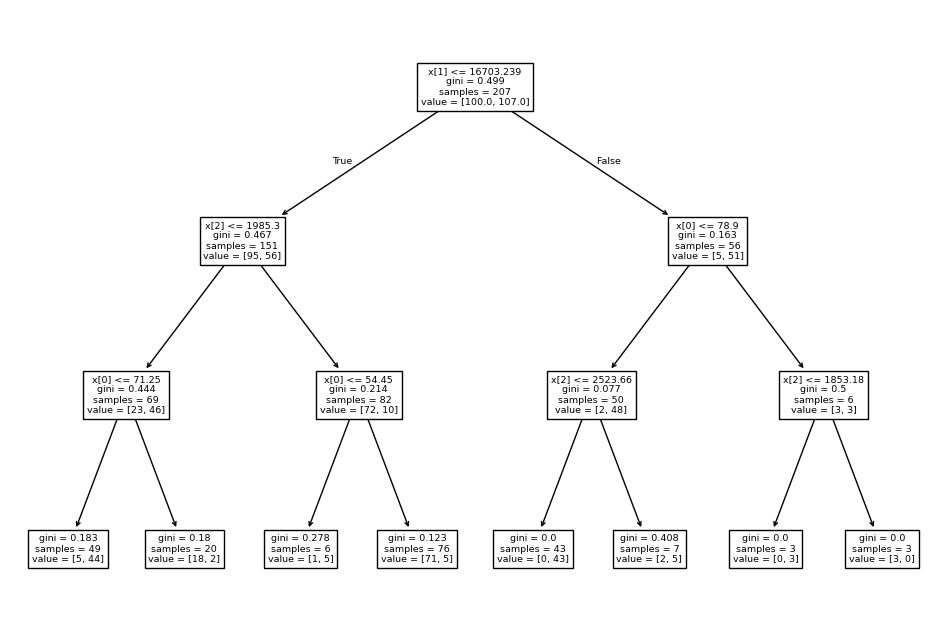

In [18]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

#Predicting the data
y_pred_gini = clf_gini.predict(x_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

#Printing the predicted values
y_pred_train_gini = clf_gini.predict(x_train)
print(y_pred_train_gini)

 #calculating the accuracy of the training dataset
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

 #Plotting the decision tree using matplot library (this will be black & white image)
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train))

#Plotting the decision tree using graphviz library (This will be more vibrant and visually enhanced)
dot_data= tree.export_graphviz(
    clf_gini,
    out_file=None,
    feature_names= x_train.columns,
    class_names=[str(c) for c in y_train.unique()],
    filled =True,
    rounded= True,
    special_characters=True 
)
graph=graphviz.Source(dot_data)
graph

In [19]:
# instantiate the DecisionTreeClassifier model with criterion gini entropy
from sklearn.tree import DecisionTreeClassifier
clf_entropy= DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
# fit the model
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [20]:
#Predicting the data
y_pred_entropy = clf_entropy.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion entropy index : {0:0.04f}".format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index : 0.8778


In [22]:
#Printing the predicted values
y_pred_train_entropy = clf_entropy.predict(x_train)
y_pred_train_entropy

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [23]:
 #calculating the accuracy of the training dataset
print("Training set accuracy score : {0:0.04f}".format(accuracy_score(y_train, y_pred_train_entropy)))

Training set accuracy score : 0.9082


In [24]:
# print the scores on training and test set
print("Training set score : {0:0.04f}".format(clf_entropy.score(x_train, y_train)))
print("Test set score : {0:0.04f}".format(clf_entropy.score(x_test, y_test)))

Training set score : 0.9082
Test set score : 0.8778


[Text(0.5416666666666666, 0.875, 'x[1] <= 16703.239\nentropy = 0.999\nsamples = 207\nvalue = [100.0, 107.0]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 1985.3\nentropy = 0.951\nsamples = 151\nvalue = [95, 56]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[0] <= 71.25\nentropy = 0.918\nsamples = 69\nvalue = [23, 46]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.475\nsamples = 49\nvalue = [5, 44]'),
 Text(0.25, 0.125, 'entropy = 0.469\nsamples = 20\nvalue = [18, 2]'),
 Text(0.5, 0.375, 'x[0] <= 61.75\nentropy = 0.535\nsamples = 82\nvalue = [72, 10]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.94\nsamples = 28\nvalue = [18, 10]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 54\nvalue = [54, 0]'),
 Text(0.75, 0.625, 'x[2] <= 2104.675\nentropy = 0.434\nsamples = 56\nvalue = [5, 51]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.8333333333333334, 0.375, 'x

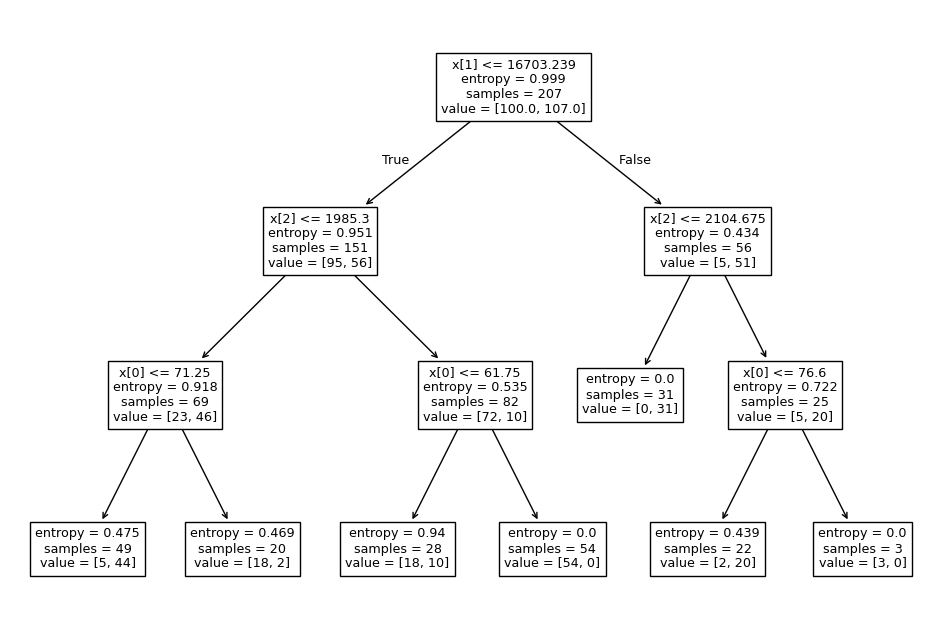

In [25]:
 #Plotting the decision tree using matplot library (this will be black & white image)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(x_train, y_train))

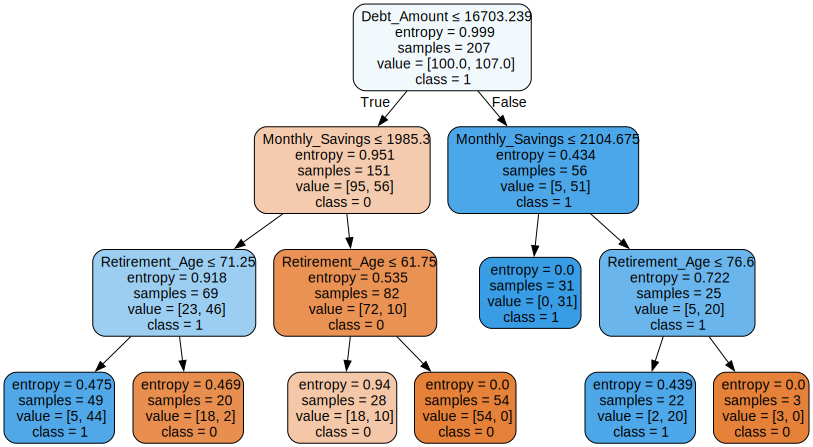

In [26]:
#Plotting the decision tree using graphviz library (This will be more vibrant and visually enhanced)
import graphviz
from sklearn import tree

dot_data= tree.export_graphviz(
    clf_entropy,
    out_file=None,
    feature_names= x_train.columns,
    class_names=[str(c) for c in y_train.unique()],
    filled =True,
    rounded= True,
    special_characters=True 
)
graph=graphviz.Source(dot_data)
graph